# CSE 4238 | Assignment 3
---
---

ID = 063,
Dataset = 1,
Model = Bidirectional RNN

In [1]:
# The dataset => https://drive.google.com/file/d/1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3/view
!gdown --id 1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk

Downloading...
From: https://drive.google.com/uc?id=1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk
To: /content/Dataset 1.csv
100% 999k/999k [00:00<00:00, 67.3MB/s]


## Import Required Libraries
---
Importing libraries that will be required for the experiment.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Read the Original Data
---
Read the original data from the CSV file found

In [4]:
data = pd.read_csv('/content/Dataset 1.csv', engine = 'python')

data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## Understanding Data
---

Randomize the data and see what are the labels along with data in CSV

In [6]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['label'].value_counts(0))
data

0    8000
1    2314
Name: label, dtype: int64


,message,label
0,"@curious1966 Not sure, depends on who wants a ...",0
1,I'm Forgot all my problems and depression when...,1
2,"i mean, probably he was way more depressed tha...",1
3,naptime. thanx to all of my followers--i just...,0
4,@MentalStrawbery yeah i didn't change it i was...,0
...,...,...
10309,Ewww! Watery tea! The bag should be brewed for...,0
10310,#depression is to feel like crying every time ...,1
10311,@fawfulfan @AEC_PA @AdreanaInLB @MairinMurphy ...,1
10312,Whether you are excited to graduate or nervous...,1


## Dividing Dataset
---
Dividing dataset into 6:2:2 ratio as Training:Validation:Testing.

Also, *EPOCH* variable is declared for controlling how many epochs for training.

After that, observe the data in Train, Val and Test splits.

ltimatey, convert the data into NumPy array for later usage.

In [7]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [9]:
print(dataTrain['label'].value_counts())

dataTrain

0    4773
1    1417
Name: label, dtype: int64


,message,label
0,"@curious1966 Not sure, depends on who wants a ...",0
1,I'm Forgot all my problems and depression when...,1
2,"i mean, probably he was way more depressed tha...",1
3,naptime. thanx to all of my followers--i just...,0
4,@MentalStrawbery yeah i didn't change it i was...,0
...,...,...
6185,Is anyone joomla-savvyyy? We just need a lil t...,0
6186,Recommend @dcjc Tea Party 2.0 http://tparty2...,0
6187,loving lady G's new song,0
6188,A meta-analysis of 23 peerrun programmes for d...,1


In [10]:
print(dataVal['label'].value_counts())

dataVal

0    1610
1     452
Name: label, dtype: int64


,message,label
6190,Time to take a shower o.o And later iÂ´ll visi...,0
6191,@kierij_ WOW you just have a sample of depress...,1
6192,@theStatus Thanks guys I now have a whole 8 f...,0
6193,Why aren the kardashians the most entertaining...,0
6194,Learning how to forgive myself for the stagnan...,1
...,...,...
8247,"That hard beat of your heart, the endless doub...",1
8248,yes.... yes it is,0
8249,@mrsnasirjones u rdy 2 masterbate hun?? cuz I am,0
8250,just awhile ago me and my dad played wii sport...,0


In [11]:
print(dataTest['label'].value_counts())

dataTest

0    1617
1     445
Name: label, dtype: int64


,message,label
8252,Depression is real,1
8253,@JChidester it's a blessing and a curse. I gl...,0
8254,Onibus com personagem do Tim Burton,0
8255,@hewholovesher hope everything goes good,0
8256,@cM5y_fawkes Your house is famous! didn't you ...,0
...,...,...
10309,Ewww! Watery tea! The bag should be brewed for...,0
10310,#depression is to feel like crying every time ...,1
10311,@fawfulfan @AEC_PA @AdreanaInLB @MairinMurphy ...,1
10312,Whether you are excited to graduate or nervous...,1


In [12]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

# # To check the outcome
# print(trainX)
# print(trainY)
# print(valX)
# print(valY)
# print(testX)
# print(testY)

# print(trainX.shape)
# print(trainY.shape)
# print(valX.shape)
# print(valY.shape)
# print(testX.shape)
# print(testY.shape)

## Tokenizing Data
---

Processing the data. Use train data to fit on the text. Later use it to construct sequences for all of the train, val, test quality.

In [13]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

In [ ]:
# # To check the outcome
# print(trainX)
# print(valX)
# print(testX)
# print('=====')
# print(train_seqs)
# print(val_seqs)
# print(test_seqs)
# print('=====')
# print(train_seqs.shape)
# print(val_seqs.shape)
# print(test_seqs.shape)

## Develop Model
---
Develop the model and print it.

Train the model and observe the values.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2084608   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         197120    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1024)        1049600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         139392    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                2192      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 3,472,929
Trainable params: 3,472,929
Non-trainable params: 0
______________________________________________

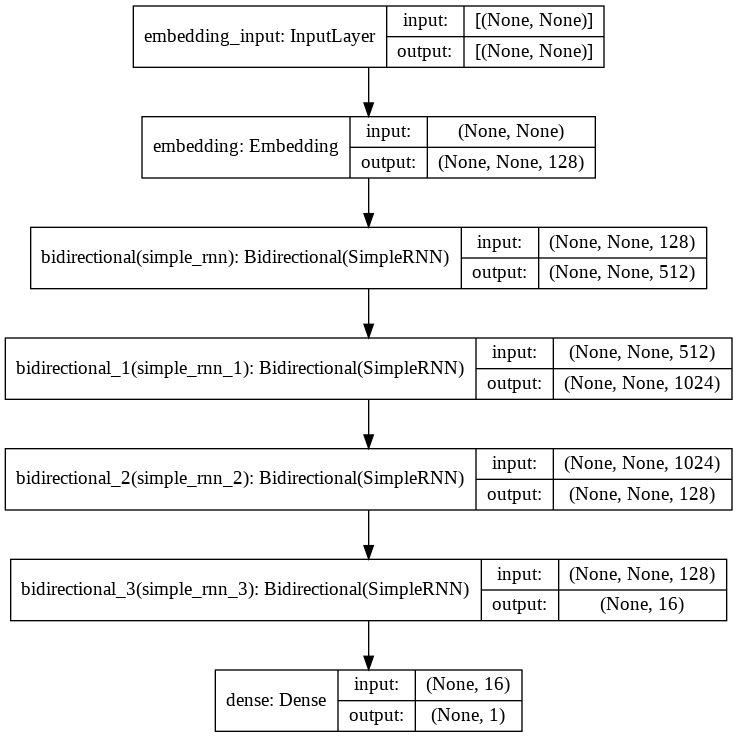

In [14]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.SimpleRNN(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 230s 1s/step - loss: 0.5469 - accuracy: 0.7656 - val_loss: 0.5685 - val_accuracy: 0.7803
Epoch 2/10
194/194 [==============================] - 216s 1s/step - loss: 0.5383 - accuracy: 0.7721 - val_loss: 0.5261 - val_accuracy: 0.7808
Epoch 3/10
194/194 [==============================] - 217s 1s/step - loss: 0.5378 - accuracy: 0.7716 - val_loss: 0.5261 - val_accuracy: 0.7808
Epoch 4/10
194/194 [==============================] - 219s 1s/step - loss: 0.5362 - accuracy: 0.7729 - val_loss: 0.5261 - val_accuracy: 0.7808
Epoch 5/10
194/194 [==============================] - 216s 1s/step - loss: 0.5354 - accuracy: 0.7733 - val_loss: 0.5258 - val_accuracy: 0.7808
Epoch 6/10
194/194 [==============================] - 218s 1s/step - loss: 0.5338 - accuracy: 0.7746 - val_loss: 0.5282 - val_accuracy: 0.7808
Epoch 7/10
194/194 [==============================] - 221s 1s/step - loss: 0.5296 - accuracy: 0.7782 - val_loss: 0.5235 - val_accuracy: 0.7827

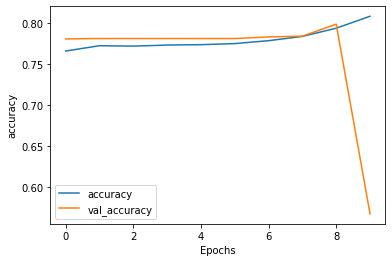

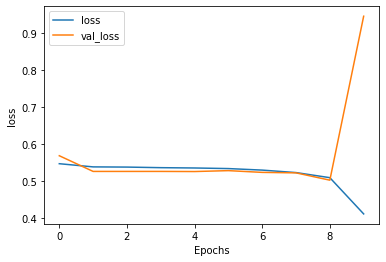


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.765590 	   0.546935 	   0.780310 	   0.568475
       2   0.772052 	   0.538337 	   0.780795 	   0.526094
       3   0.771567 	   0.537805 	   0.780795 	   0.526091
       4   0.772859 	   0.536228 	   0.780795 	   0.526120
       5   0.773344 	   0.535374 	   0.780795 	   0.525780
       6   0.774637 	   0.533781 	   0.780795 	   0.528208
       7   0.778191 	   0.529642 	   0.782735 	   0.523488
       8   0.783360 	   0.522969 	   0.783705 	   0.522179
       9   0.793376 	   0.509195 	   0.798254 	   0.502430
      10   0.807916 	   0.411242 	   0.567410 	   0.945462


In [15]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

## Find Performance
---
Use the developed model to see how it performs in al the datasets.

Separate performance was calculated for all the Train, Val and Test data.

### Train Data Performance

194/194 [==============================] - 17s 84ms/step - loss: 0.3978 - accuracy: 0.7711
Train Loss: 0.3978252410888672
Train Accuracy: 0.7710824012756348 (Model Metric)
Train Accuracy: 0.7710823909531502 (sklearn Metric)
Train Precision: 0.0
Train Recall: 0.0
Train F1-score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


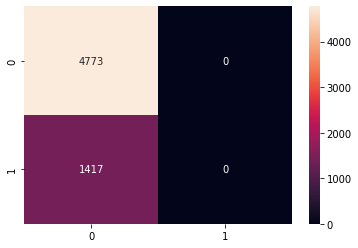

In [16]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Val Data Performance

65/65 [==============================] - 5s 72ms/step - loss: 0.9455 - accuracy: 0.5674
Validation Loss: 0.9454617500305176
Validation Accuracy: 0.5674102902412415 (Model Metric)
Validation Accuracy: 0.5674102812803103 (sklearn Metric)
Validation Precision: 0.324
Validation Recall: 0.8960176991150443
Validation F1-score: 0.4759106933019977


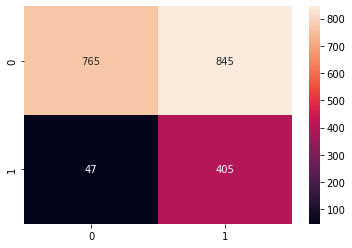

In [17]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 5s 68ms/step - loss: 0.7359 - accuracy: 0.5606
Test Loss: 0.7358920574188232
Test Accuracy: 0.5606207847595215 (Model Metric)
Test Accuracy: 0.5606207565470417 (sklearn Metric)
Test Precision: 0.3180741910023678
Test Recall: 0.9056179775280899
Test F1-score: 0.47079439252336447


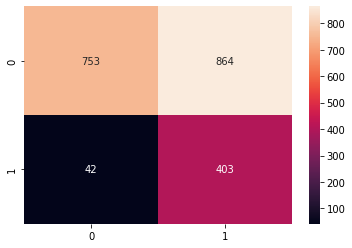

In [18]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')

$\Large\text{Thus, it concludes the full experiment.}$